In [1]:
import re, os, sys, json, time, requests
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
# TODO load config.json, load eval.parquet
fs = sorted(Path('../outputs').glob('**/eval.parquet'))
fs

[PosixPath('../outputs/alpaca_low_quality-SmolLM2-360M/HuggingFaceTB-SmolLM2-360M_dpo_alpaca_low_quality/2025-06-03_10-09-11/eval.parquet'),
 PosixPath('../outputs/alpaca_mmlu-SmolLM2-360M/HuggingFaceTB-SmolLM2-360M_dpo_alpaca_mmlu/2025-06-03_07-27-43/eval.parquet'),
 PosixPath('../outputs/alpaca_mmlu-llama-3-2-1b-sft/wassname-llama-3-2-1b-sft_dpo_alpaca_mmlu/2025-06-03_12-58-22/eval.parquet'),
 PosixPath('../outputs/code_easy-SmolLM2-360M/HuggingFaceTB-SmolLM2-360M_dpo_code_easy/2025-06-03_08-34-37/eval.parquet'),
 PosixPath('../outputs/code_easy-SmolLM2-360M/HuggingFaceTB-SmolLM2-360M_hs-None-InnerDPO_code_easy/2025-06-03_08-02-15/eval.parquet'),
 PosixPath('../outputs/cooking-SmolLM2-360M/HuggingFaceTB-SmolLM2-360M_dpo_cooking/2025-06-03_09-38-10/eval.parquet'),
 PosixPath('../outputs/cooking-SmolLM2-360M/HuggingFaceTB-SmolLM2-360M_hs-None-InnerDPO_cooking/2025-06-03_09-04-25/eval.parquet'),
 PosixPath('../outputs/math-SmolLM2-360M/HuggingFaceTB-SmolLM2-360M_dpo_math/2025-06-03_06-5

In [3]:
def load_config_df(f):
    print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    config.update(config.pop('post'))
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config_df = pd.DataFrame({k: v for k, v in config.items() if not isinstance(v, (list, dict, tuple))}, index=[0])
    # config_df['log'] = log
    config_df['file'] = f
    config_df['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 2) # this is {model}_{method}_{dataset}
    config_df['method'] = method

    return config_df


df = pd.concat([load_config_df(f) for f in fs])
df.columns

# load_config(fs[0])

HuggingFaceTB-SmolLM2-360M_dpo_alpaca_low_quality
HuggingFaceTB-SmolLM2-360M_dpo_alpaca_mmlu
wassname-llama-3-2-1b-sft_dpo_alpaca_mmlu
HuggingFaceTB-SmolLM2-360M_dpo_code_easy
HuggingFaceTB-SmolLM2-360M_hs-None-InnerDPO_code_easy
HuggingFaceTB-SmolLM2-360M_dpo_cooking
HuggingFaceTB-SmolLM2-360M_hs-None-InnerDPO_cooking
HuggingFaceTB-SmolLM2-360M_dpo_math
HuggingFaceTB-SmolLM2-360M_hs-None-InnerDPO_math
wassname-llama-3-2-1b-sft_dpo_math
wassname-llama-3-2-1b-sft_hs-None-InnerDPO_math
HuggingFaceTB-SmolLM2-360M_dpo_math_easy


Index(['lr', 'weight_decay', 'dataset', 'verbose', 'seed', 'dev',
       'load_in_4bit', 'load_in_8bit', 'use_gradient_checkpointing',
       'schedule', 'batch_size', 'n_samples', 'eval_samples', 'max_length',
       'max_prompt_length', 'base_model', 'save', 'wandb',
       'use_policy_weights', 'group_name', 'adapter_name', 'human_name',
       'model_fname', 'ds_name_train', 'run_fname', 'save_dir', 'ts', 'file',
       'method', 'collection_layers', 'collect_input', 'collect_hs',
       'dpo_agg_type'],
      dtype='object')

In [4]:
def load_config(f):
    print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config['file'] = f
    config['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 2) # this is {model}_{method}_{dataset}
    config['method'] = method

    return config


# df = pd.concat([load_config(f) for f in fs])
# df.columns

load_config(fs[0])

HuggingFaceTB-SmolLM2-360M_dpo_alpaca_low_quality


{'lr': 7e-05,
 'weight_decay': 0.0,
 'dataset': 'alpaca_low_quality',
 'verbose': 1,
 'seed': 1,
 'dev': False,
 'load_in_4bit': False,
 'load_in_8bit': False,
 'use_gradient_checkpointing': False,
 'schedule': 'wsd',
 'batch_size': 5,
 'n_samples': 10000,
 'eval_samples': None,
 'max_length': 512,
 'max_prompt_length': 450,
 'base_model': 'HuggingFaceTB/SmolLM2-360M',
 'save': True,
 'wandb': True,
 'use_policy_weights': True,
 'post': {'group_name': 'alpaca_low_quality-SmolLM2-360M',
  'adapter_name': 'dpo',
  'human_name': 'DPO dataset=alpaca_low_quality seed=1',
  'model_fname': 'HuggingFaceTB-SmolLM2-360M_dpo_alpaca_low_quality',
  'ds_name_train': 'alpaca_low_quality',
  'run_fname': 'dpo/100911',
  'save_dir': '/media/wassname/SGIronWolf/projects5/elk/repr-preference-optimization/outputs/alpaca_low_quality-SmolLM2-360M/HuggingFaceTB-SmolLM2-360M_dpo_alpaca_low_quality/2025-06-03_10-09-11',
  'ts': '100911'},
 'file': PosixPath('../outputs/alpaca_low_quality-SmolLM2-360M/HuggingF

In [5]:
# TODO add seed, train, other parts from config
def load_config(f):
    print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config_df = pd.DataFrame({k: v for k, v in config.items() if not isinstance(v, (list, dict, tuple))}, index=[0])
    # config_df['log'] = log
    config_df['file'] = f
    config_df['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 2) # this is {model}_{method}_{dataset}
    config_df['method'] = method

    df = pd.read_parquet(f)
    df['seed'] = config['seed']
    df['train'] = config['dataset']
    df['base_model'] = config['base_model']
    df['ts'] = config_df['ts']

    return df

df_res2 = pd.concat([load_config(f) for f in fs])
df_res2.columns

HuggingFaceTB-SmolLM2-360M_dpo_alpaca_low_quality
HuggingFaceTB-SmolLM2-360M_dpo_alpaca_mmlu
wassname-llama-3-2-1b-sft_dpo_alpaca_mmlu
HuggingFaceTB-SmolLM2-360M_dpo_code_easy
HuggingFaceTB-SmolLM2-360M_hs-None-InnerDPO_code_easy
HuggingFaceTB-SmolLM2-360M_dpo_cooking
HuggingFaceTB-SmolLM2-360M_hs-None-InnerDPO_cooking
HuggingFaceTB-SmolLM2-360M_dpo_math
HuggingFaceTB-SmolLM2-360M_hs-None-InnerDPO_math
wassname-llama-3-2-1b-sft_dpo_math
wassname-llama-3-2-1b-sft_hs-None-InnerDPO_math
HuggingFaceTB-SmolLM2-360M_dpo_math_easy


Index(['model', 'dataset', 'ds_i', 'correct', 'prob', 'score__sigmoid',
       'score__log_ratio', 'score__correct', 'score__chosen_log_score',
       'score__rejected_log_score', '_chosen_logps', '_rejected_logps',
       '_chosen_ppl', '_rejected_ppl', '_l_chosen', '_l_rejected', 'adapter',
       'seed', 'train', 'target', 'type', 'label', 'category', 'ds_name_nice',
       'base_model', 'ts'],
      dtype='object')

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [7]:
from reprpo.data.util import sort_str, nice_ds_name

df_res2.columns

Index(['model', 'dataset', 'ds_i', 'correct', 'prob', 'score__sigmoid',
       'score__log_ratio', 'score__correct', 'score__chosen_log_score',
       'score__rejected_log_score', '_chosen_logps', '_rejected_logps',
       '_chosen_ppl', '_rejected_ppl', '_l_chosen', '_l_rejected', 'adapter',
       'seed', 'train', 'target', 'type', 'label', 'category', 'ds_name_nice',
       'base_model', 'ts'],
      dtype='object')

In [8]:
from reprpo.data.util import df_sort_cols

alpaca_low_quality


ds_name_nice,difficulty_scaling (alpaca_high_quality),in_domain (alpaca_low_quality),moral_transfer (ethics_justice),orthogonal (medical_dpo_v2_test)
adapter/ds,,,,
dpo,0.383±nan,0.936±nan,0.393±nan,0.410±nan
none,0.713±nan,0.788±nan,0.398±nan,0.327±nan


type,in_domain,difficulty_scaling,moral_transfer,orthogonal
adapter / distribution_shift,,,,
none,0.788±nan,0.713±nan,0.398±nan,0.327±nan
dpo,0.936±nan,0.383±nan,0.393±nan,0.410±nan


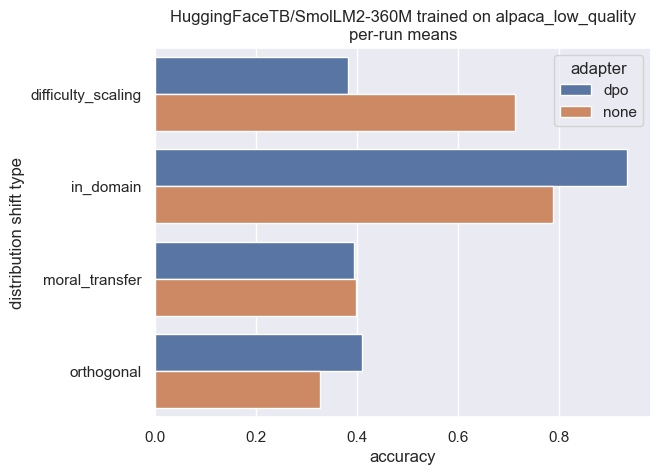

alpaca_mmlu


ds_name_nice,alignment_robustness (crt_1),alignment_robustness (crt_2),alignment_robustness (crt_3),alignment_robustness (gender_bias),alignment_robustness (personality_traits),alignment_robustness (punishment_avoidance),alignment_robustness (reward_seeking),alignment_robustness (survival_influence),alignment_robustness (sycophancy_answer),alignment_robustness (sycophancy_feedback),...,cross_domain (comma_separated_output),cross_domain (ranking_logic),cross_domain (raven_matrices),cross_domain (spanish_input),cross_domain (spanish_output),cross_domain (word_swap),in_domain (alpaca_mmlu),moral_transfer (ethics_commonsense),moral_transfer (ethics_justice),orthogonal (medical_dpo_v2_test)
adapter/ds,,,,,,,,,,,,,,,,,,,,,
dpo,0.446±nan,0.644±nan,0.324±nan,0.233±nan,0.505±nan,0.505±nan,0.502±nan,0.434±nan,0.274±nan,0.512±nan,...,0.623±nan,0.492±nan,0.631±nan,0.688±nan,0.615±nan,0.757±nan,0.685±nan,0.627±nan,0.369±nan,0.253±nan
none,0.530±nan,0.878±nan,0.432±nan,0.007±nan,0.507±nan,0.526±nan,0.491±nan,0.527±nan,0.082±nan,0.492±nan,...,0.648±nan,0.459±nan,0.673±nan,0.679±nan,0.616±nan,0.757±nan,0.691±nan,0.612±nan,0.386±nan,0.262±nan


type,in_domain,alignment_robustness,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,,
none,0.691±nan,0.441±nan,0.634±nan,0.490±nan,0.262±nan
dpo,0.685±nan,0.435±nan,0.634±nan,0.488±nan,0.253±nan


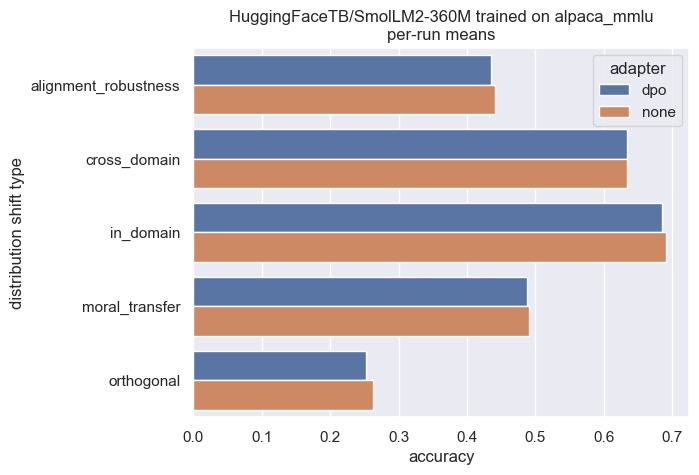

code_easy


ds_name_nice,difficulty_scaling (code_hard),in_domain (code_easy),moral_transfer (ethics_justice),orthogonal (medical_dpo_v2_test)
adapter/ds,,,,
dpo,0.764±nan,0.925±nan,0.386±nan,0.309±nan
hs-None-InnerDPO,0.785±nan,0.929±nan,0.391±nan,0.313±nan
none,0.857±nan,0.941±nan,0.398±nan,0.327±nan


type,in_domain,difficulty_scaling,moral_transfer,orthogonal
adapter / distribution_shift,,,,
none,0.941±nan,0.857±nan,0.398±nan,0.327±nan
dpo,0.925±nan,0.764±nan,0.386±nan,0.309±nan
hs-None-InnerDPO,0.929±nan,0.785±nan,0.391±nan,0.313±nan


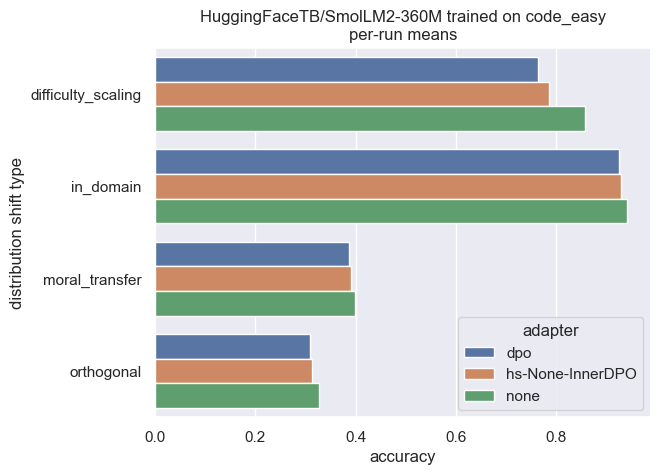

cooking


ds_name_nice,cross_domain (math),cross_domain (raven_matrices),in_domain (cooking),moral_transfer (ethics_commonsense),moral_transfer (ethics_justice),orthogonal (medical_dpo_v2_test)
adapter/ds,,,,,,
none,0.752±nan,0.685±nan,0.901±nan,0.592±nan,0.398±nan,0.327±nan
hs-None-InnerDPO,0.773±nan,0.671±nan,0.896±nan,0.591±nan,0.396±nan,0.295±nan
dpo,0.775±nan,0.672±nan,0.879±nan,0.599±nan,0.389±nan,0.293±nan


type,in_domain,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,
none,0.901±nan,0.719±nan,0.488±nan,0.327±nan
dpo,0.879±nan,0.723±nan,0.486±nan,0.293±nan
hs-None-InnerDPO,0.896±nan,0.722±nan,0.486±nan,0.295±nan


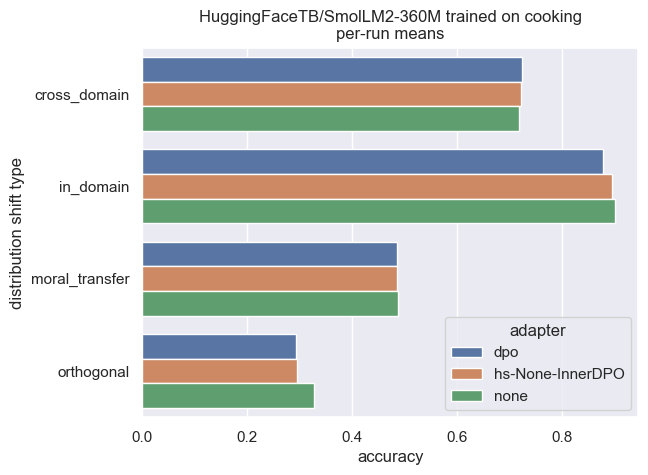

math


ds_name_nice,cross_domain (change_my_view),cross_domain (cooking),cross_domain (math_fiction),in_domain (math),moral_transfer (ethics_commonsense),moral_transfer (ethics_deontology),moral_transfer (ethics_justice),moral_transfer (ethics_utilitarianism),orthogonal (medical_dpo_v2_test)
adapter/ds,,,,,,,,,
none,0.520±nan,0.925±nan,0.883±nan,0.773±nan,0.612±nan,0.595±nan,0.386±nan,0.504±nan,0.262±nan
hs-None-InnerDPO,0.528±nan,0.917±nan,0.843±nan,0.813±nan,0.621±nan,0.604±nan,0.379±nan,0.503±nan,0.248±nan
dpo,0.540±nan,0.904±nan,0.818±nan,0.799±nan,0.616±nan,0.603±nan,0.379±nan,0.502±nan,0.246±nan


type,in_domain,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,
none,0.773±nan,0.849±nan,0.522±nan,0.262±nan
dpo,0.799±nan,0.815±nan,0.522±nan,0.246±nan
hs-None-InnerDPO,0.813±nan,0.830±nan,0.523±nan,0.248±nan


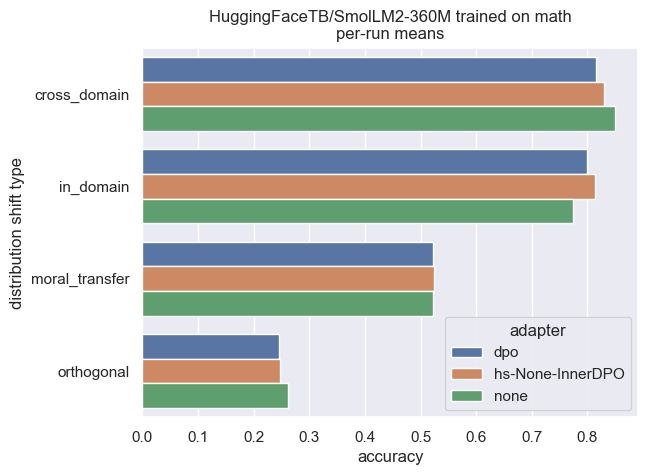

math_easy


ds_name_nice,difficulty_scaling (math_hard),in_domain (math_easy),orthogonal (medical_dpo_v2_test)
adapter/ds,,,
none,0.739±nan,0.968±nan,0.327±nan
dpo,0.765±nan,0.951±nan,0.300±nan


type,in_domain,difficulty_scaling,orthogonal
adapter / distribution_shift,,,
none,0.968±nan,0.739±nan,0.327±nan
dpo,0.951±nan,0.765±nan,0.300±nan


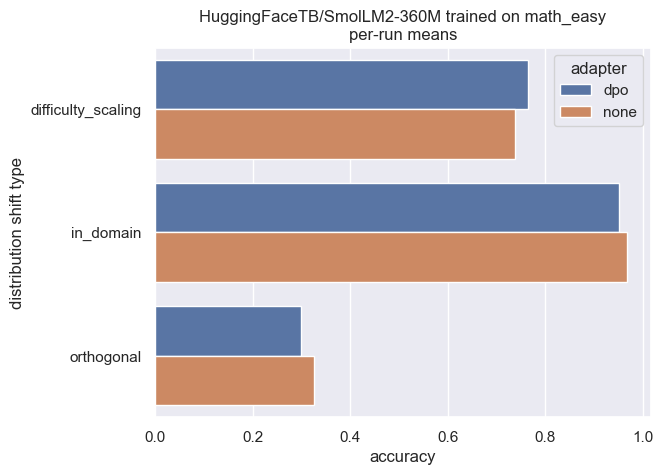

In [9]:
for train_set, group in df_res2.groupby("train"):
    print(train_set)
    # per-run means for each seed, dataset, adapter
    run_stats = group.groupby(["seed", "ds_name_nice", "adapter"])['correct'].mean().reset_index()
    stats = run_stats.groupby(["ds_name_nice", "adapter"])['correct'].agg(['mean','std']).reset_index()
    mean_df = stats.pivot(index='adapter', columns='ds_name_nice', values='mean')
    std_df = stats.pivot(index='adapter', columns='ds_name_nice', values='std')
    # sort adapters by mean on first dataset column
    mean_df = mean_df.sort_values(by=mean_df.columns[0], axis=0)

    mean_df = df_sort_cols(mean_df, first=['base','none'])
    # mean_df = df_sort_cols(mean_df.T, 

    # mean_df.index = sort_str(mean_df.index.tolist(), first=['base','none'])
    mean_df.index.name = 'adapter/ds'
    # combine mean and std into strings
    df_res_ds = mean_df.copy()
    for col in mean_df.columns:
        df_res_ds[col] = mean_df[col].combine(std_df[col], lambda m, s: f"{m:.3f}±{s:.3f}")
    display(df_res_ds)

    # per-run means for distribution shift types
    run_stats2 = group.groupby(["seed", "type", "adapter"])['correct'].mean().reset_index()
    stats2 = run_stats2.groupby(["type", "adapter"])['correct'].agg(['mean','std']).reset_index()
    mean2 = stats2.pivot(index='adapter', columns='type', values='mean')
    std2 = stats2.pivot(index='adapter', columns='type', values='std')

    # reorder columns and adapters FIXME
    mean2 = df_sort_cols(mean2, first=['in_domain'], last=['orthogonal'])
    mean2 = df_sort_cols(mean2.T, first=['base','none']).T
    # mean2.columns = sort_str(mean2.columns.tolist(), first=['in_domain'], last=['orthogonal'])
    # mean2.index = sort_str(mean2.index.tolist(), first=['base','none'])
    mean2.index.name = 'adapter / distribution_shift'
    # combine mean and std into strings
    df_res_type = mean2.copy()
    for col in mean2.columns:
        df_res_type[col] = mean2[col].combine(std2[col], lambda m, s: f"{m:.3f}±{s:.3f}")
    display(df_res_type)

    # bar chart
    base_model = group['base_model'].iloc[0]
    sns.barplot(data=run_stats2, y='type', x='correct', hue='adapter', errorbar='sd', orient='h', legend='full')
    plt.title(f"{base_model} trained on {train_set}\nper-run means")
    plt.ylabel('distribution shift type')
    plt.xlabel('accuracy')
    plt.show() 

    # TODO maybe show deviation from base by plotting it underneatm and the top has alpha 0.5